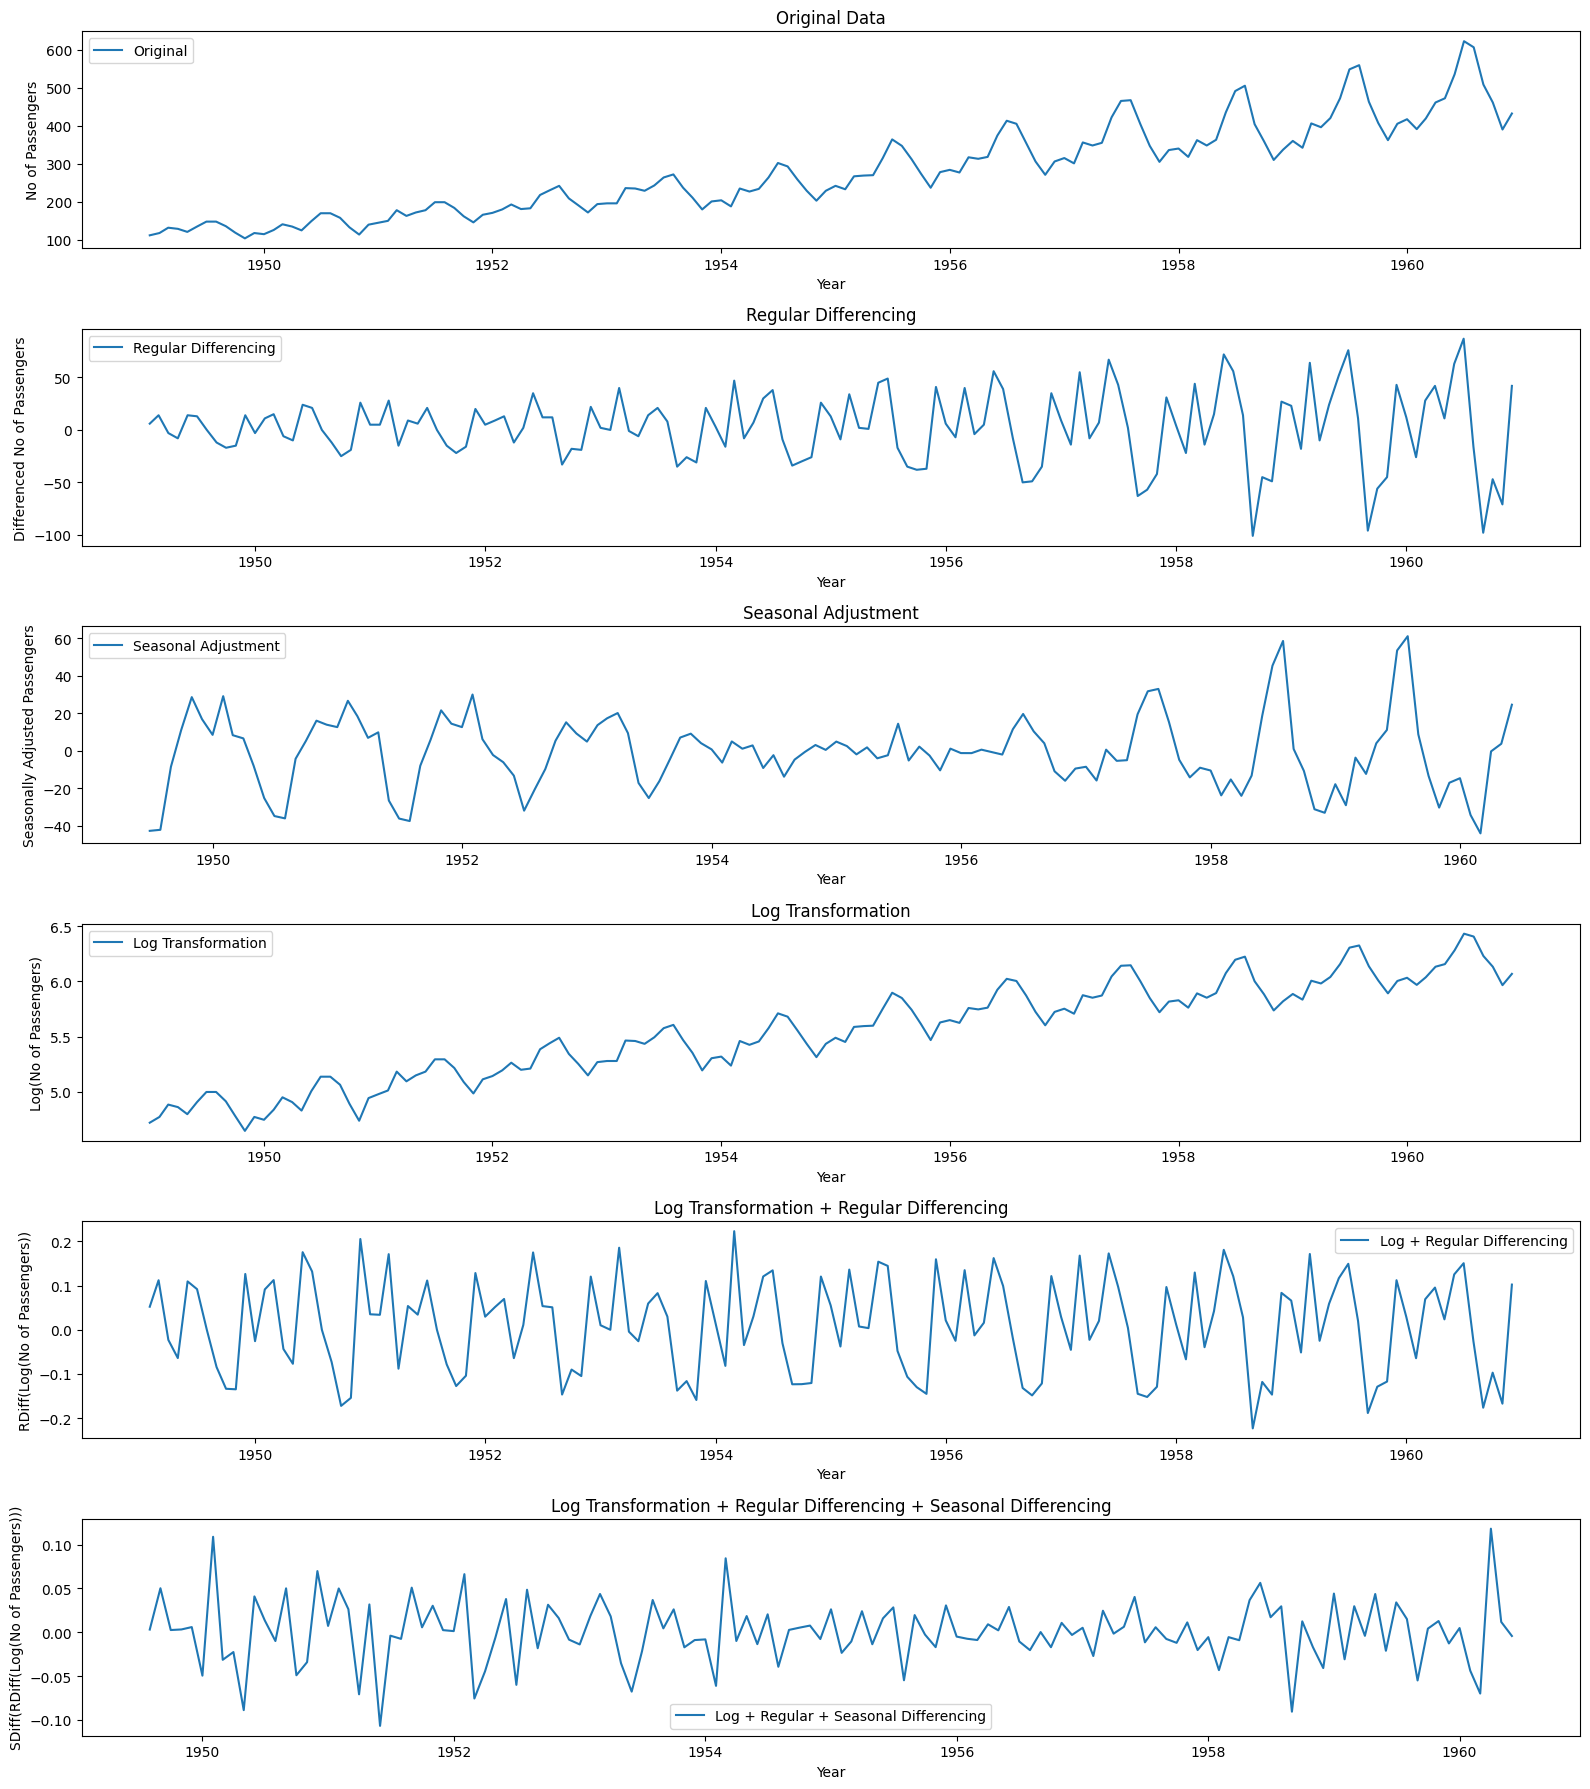

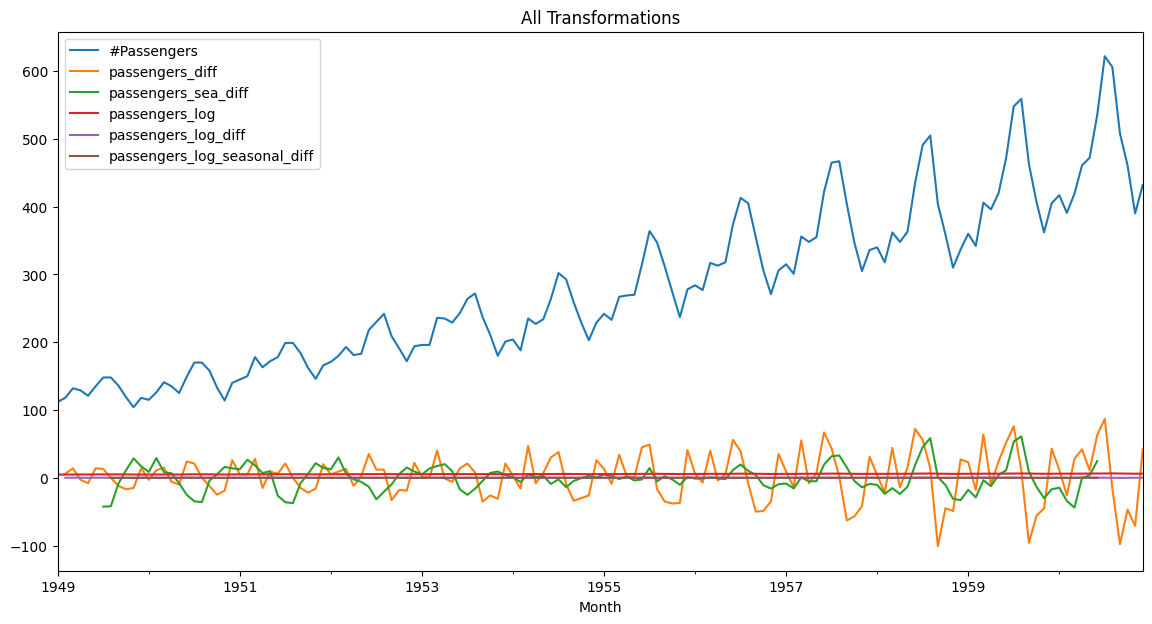


Final Data (first 10 rows):
            #Passengers  passengers_diff  passengers_sea_diff  passengers_log  \
Month                                                                           
1949-01-01          112              NaN                  NaN        4.718499   
1949-02-01          118              6.0                  NaN        4.770685   
1949-03-01          132             14.0                  NaN        4.882802   
1949-04-01          129             -3.0                  NaN        4.859812   
1949-05-01          121             -8.0                  NaN        4.795791   
1949-06-01          135             14.0                  NaN        4.905275   
1949-07-01          148             13.0           -42.622475        4.997212   
1949-08-01          148              0.0           -42.073232        4.997212   
1949-09-01          136            -12.0            -8.478535        4.912655   
1949-10-01          119            -17.0            11.059343        4.779123   

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "/content/AirPassengers.csv"
data = pd.read_csv(file_path)

# Fix column names if needed
if 'Month' not in data.columns:
    data.rename(columns={data.columns[0]: 'Month'}, inplace=True)

if '#Passengers' not in data.columns:
    data.rename(columns={data.columns[1]: '#Passengers'}, inplace=True)

# Convert Month to datetime
data['Month'] = pd.to_datetime(data['Month'], errors='coerce')
data = data.dropna(subset=['Month'])
data.set_index('Month', inplace=True)

# Ensure numeric
data['#Passengers'] = pd.to_numeric(data['#Passengers'], errors='coerce')
data = data.dropna()

# Regular differencing
data['passengers_diff'] = data['#Passengers'] - data['#Passengers'].shift(1)

# Seasonal decomposition
result = seasonal_decompose(data['#Passengers'], model='additive', period=12)
data['passengers_sea_diff'] = result.resid

# Log transform
data['passengers_log'] = np.log(data['#Passengers'])

# Log differencing
data['passengers_log_diff'] = data['passengers_log'] - data['passengers_log'].shift(1)

# Seasonal decomposition on log-differenced data
result = seasonal_decompose(data['passengers_log_diff'].dropna(), model='additive', period=12)
data['passengers_log_seasonal_diff'] = result.resid

# Plot 6 stacked subplots
plt.figure(figsize=(16, 18))

plt.subplot(6, 1, 1)
plt.plot(data['#Passengers'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')
plt.xlabel('Year')
plt.ylabel('No of Passengers')

plt.subplot(6, 1, 2)
plt.plot(data['passengers_diff'], label='Regular Differencing')
plt.legend(loc='best')
plt.title('Regular Differencing')
plt.xlabel('Year')
plt.ylabel('Differenced No of Passengers')

plt.subplot(6, 1, 3)
plt.plot(data['passengers_sea_diff'], label='Seasonal Adjustment')
plt.legend(loc='best')
plt.title('Seasonal Adjustment')
plt.xlabel('Year')
plt.ylabel('Seasonally Adjusted Passengers')

plt.subplot(6, 1, 4)
plt.plot(data['passengers_log'], label='Log Transformation')
plt.legend(loc='best')
plt.title('Log Transformation')
plt.xlabel('Year')
plt.ylabel('Log(No of Passengers)')

plt.subplot(6, 1, 5)
plt.plot(data['passengers_log_diff'], label='Log + Regular Differencing')
plt.legend(loc='best')
plt.title('Log Transformation + Regular Differencing')
plt.xlabel('Year')
plt.ylabel('RDiff(Log(No of Passengers))')

plt.subplot(6, 1, 6)
plt.plot(data['passengers_log_seasonal_diff'], label='Log + Regular + Seasonal Differencing')
plt.legend(loc='best')
plt.title('Log Transformation + Regular Differencing + Seasonal Differencing')
plt.xlabel('Year')
plt.ylabel('SDiff(RDiff(Log(No of Passengers)))')

plt.tight_layout()
plt.show()

# All transformations in one line plot
data.plot(kind='line', figsize=(14, 7), title="All Transformations")
plt.show()

# Print preview
print("\nFinal Data (first 10 rows):")
print(data.head(10))
